In [23]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import os
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
FILE_NAME = 'NYPD_Motor_Vehicle_Collisions.csv'
master_df = pd.read_csv(FILE_NAME)
master_df.head(2)

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,04/30/2019,0:00,BROOKLYN,11222,40.727184,-73.950700,"(40.727184, -73.9507)",NaN,NaN,236 ECKFORD STREET,...,Unspecified,NaN,NaN,NaN,4123208,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,04/30/2019,0:00,MANHATTAN,10075,40.776318,-73.962135,"(40.776318, -73.962135)",EAST 79 STREET,MADISON AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4123128,Station Wagon/Sport Utility Vehicle,Ambulance,NaN,NaN,NaN


In [3]:
master_df.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'UNIQUE KEY', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5'],
      dtype='object')

In [4]:
related_columns_list = []
related_columns_list.append('DATE')
related_columns_list.append('UNIQUE KEY')
related_columns_list

['DATE', 'UNIQUE KEY']

In [5]:
focus_df = master_df[related_columns_list]
focus_df.head()

,DATE,UNIQUE KEY
0,04/30/2019,4123208
1,04/30/2019,4123128
2,04/30/2019,4124069
3,04/30/2019,4123202
4,04/30/2019,4123344


In [15]:
focus_df['dat3'] = [ date[-4:] for date in focus_df['DATE']]

In [35]:
gr0up_df = focus_df.drop(columns='DATE').groupby('dat3').count().reset_index() #.sum() UNIQUE KEY 1487383 total row no
gr0up_df['dat3'] = [int(date) for date in gr0up_df['dat3']]
gr0up_df.set_index('dat3', inplace=True)
gr0up_df = gr0up_df.loc[gr0up_df.index >= 2013]
gr0up_df = gr0up_df.loc[gr0up_df.index<= 2018]
gr0up_df

,UNIQUE KEY
dat3,
2013,203729
2014,206030
2015,217692
2016,229787
2017,230997
2018,231467


In [ ]:
# sn.regplot(data=gr0up_df)
x_axis = pd.Series(gr0up_df.index)
y_axis = pd.Series(gr0up_df['UNIQUE KEY'])
ax = sns.regplot(x_axis, y_axis)


In [83]:
def snsRegressionPlot(df,yTarget):
    """df is a pivoted dataframe,
    yTarget is the value to be predicted
    ----default is 'United States'
    returns plot with regression
    """
    c0lorList=['coral', 'goldenrod', 'salmon', 'orangered', 'darkolivegreen', 'olivedrab',
               'cadetblue', 'palevioletred', 'mediumorchid', 'darkorange']

    plt.rcParams["font.size"] = 12
    
    _colList_ = df.columns
    for col in _colList_:
        plt.figure(figsize = (12,8))        
        plt.title('Q6 - NO-OF-COLLUSIONS vs YEAR: TREND ANALYSIS')
        plt.xlabel('YEAR ')
        plt.ylabel('NUMBER OF COLLUSIONS')
        rand1nt = np.random.randint(0,len(c0lorList))
        c0lor = c0lorList[rand1nt] 
        x_axis = pd.Series(gr0up_df.index)
        y_axis = pd.Series(gr0up_df['UNIQUE KEY'])
        sns.regplot(y=y_axis, x=x_axis, data=df, fit_reg = True, color=c0lor, marker='o')
        plt.grid(True)
        plt.legend(loc='best')
        plt.show()
    return None

No handles with labels found to put in legend.


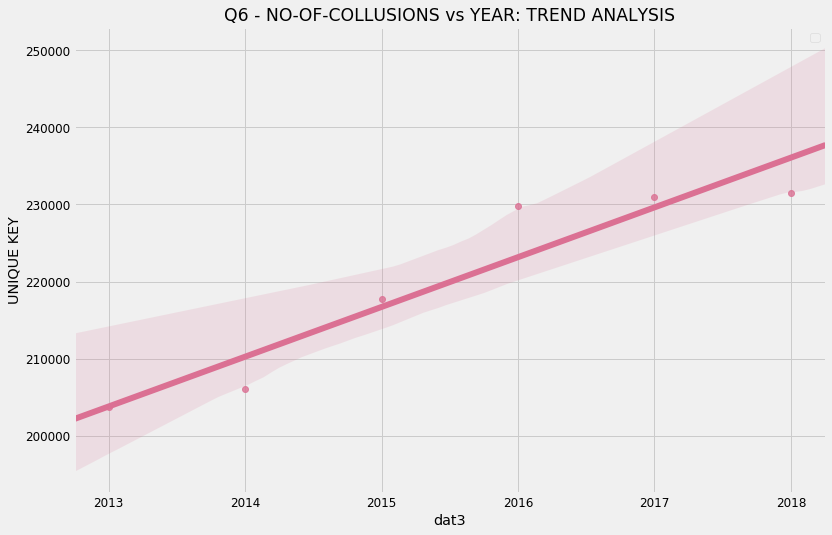

In [84]:
snsRegressionPlot(gr0up_df,'UNIQUE KEY')